## NextGen AI Camp: การปรับใช้ Neural Networks สำหรับข้อมูลเชิงตาราง (Tabular data)
##### จัดทำโดย จิรายุ เพชรแหน ภาควิชาวิศวกรรมคอมพิวเตอร์ คณะวิศวกรรมศาสตร์ สถาบันเทคโนโลยีพระจอมเกล้าเจ้าคุณทหารลาดกระบัง

### บทนำ

โจทย์ในการปรับใช้การคำนวณทำนายเชิงปฏิบัติกับข้อมูลเชิงตารางมักพบเห็นในชีวิตประจำวันได้ง่าย ๆ แต่เราอาจจะไม่รู้ เช่น การพยากรณ์อากาศ การทำนายการอนุมัติกู้ยืมสินทรัพย์ การประเมินคุณภาพผลิตภัณฑ์ อื่น ๆ อีกมากมาย แต่เราจะปรับใช้โครงข่ายประสาทเทียม (Artificial Neural Networks) อย่างไรให้สามารถรองรับการทำนายผลแบบเชิงเลขหรือคัดแยกประเภทที่เราต้องการ?

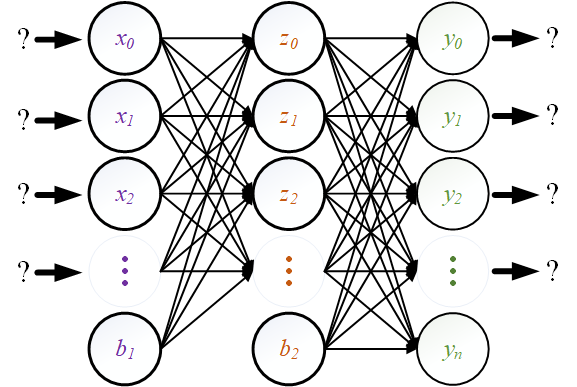

## เรียนและเข้าใจจากตัวอย่างจริง

สมมุติว่าเรามีชุดข้อมูลหนึ่งเพื่อทำนายคุณภาพของไวน์ (Wine Quality) โดยพิจารณาจากองค์ประกอบของปริมาณการวัดที่วัดได้ในขณะนั้น ๆ โดยข้อมูลในตารางประกอบด้วยคุณสมบัติหรือฟีเจอร์ดังต่อไป
*   ความเป็นกรดคงที่ (fixed acidity)
*   ความเป็นกรดระเหย (volatile acidity)
*   กรดซิตริก (citric acid)
*   น้ำตาลตกค้าง (residual sugar)
*   คลอไรด์ (chlorides)
*   ซัลเฟอร์ไดออกไซด์อิสระ (free sulfur dioxide)
*   ซัลเฟอร์ไดออกไซด์ทั้งหมด (total sulfur dioxide)
*   ความหนาแน่น (density)
*   ค่ากรด-ด่าง (pH)
*   ซัลเฟต (sulphates)
*   ปริมาณแอลกอฮอล์ (alcohol)
*   คุณภาพ (Quality)

\
### ตัวอย่างตารางข้อมูล Wine Quality

|fixed acidity|volatile acidity|citric acid|residual sugar|chlorides|free sulfur dioxide|total sulfur dioxide|density|pH|sulphates|alcohol|quality|
|-|-|-|-|-|-|-|-|-|-|-|-|
|7.4|0.70|0.00|1.9|0.076|11.0|34.0|0.9978|3.51|0.56|9.4|5|
...


In [1]:
# @title ตัวอย่างชุดข้อมูลที่ import จาก url ที่มีอยู่จริงโดยใช้ read_csv function จาก Pandas library
import pandas as pd

# vvvvvvvvvvvvvvvvvvvv
ds_import = "url"
# ^^^^^^^^^^^^^^^^^^^^
if ds_import == "url":
  # Option1: โหลดชุดข้อมูล (จาก URL ที่เข้าถึงได้)
  url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
  df = pd.read_csv(url, sep=';')
elif ds_import == "local":
  # Option2: โหลดชุดข้อมูลจากเครื่องส่วนตัว (อัพไฟล์โดยการโยนไฟล์ไปที่แถบ Files ด้านซ้ายจะได้ไฟล์ที่มีชื่อว่า winequality-red.csv)
  ds = "./winequality-red.csv"
  df = pd.read_csv(ds)
else:
  raise ValueError("choose at least one method to import dataset")

# ทดสอบดูข้อมูล
print("ดูข้อมูลฟีเจอร์ทั้งหมดที่มี: \n", df.head())
# ดูประเภทข้อมูลภายใน
print("ดูประเภทข้อมูลภายใน: \n", df.info())

ดูข้อมูลฟีเจอร์ทั้งหมดที่มี: 
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8 

-----
## โจทย์คือ

1. ต้องการวิเคราะห์และทำนายความเป็นกรด-ด่าง (pH) ของไวน์
2. ต้องการพิจารณาและทำนายคุณภาพ (Quality) ของไวน์ที่เกินหรือเท่ากับระดับ 6 ขึ้นไปถือว่าไวน์นั้นมีคุณภาพดี
-----

In [2]:
# ดูข้อมูลเอกลักษณ์ของข้อมูลฟีเจอร์ความเป็นกรด-ด่าง 'pH'
print("ค่าเอกลักษณ์จากฟีเจอร์ความเป็นกรด-ด่าง: ", df['pH'].unique(), "\n")
# ดูข้อมูลเอกลักษณ์ของข้อมูลฟีเจอร์คุณภาพไวน์ 'quality'
print("ค่าเอกลักษณ์จากฟีเจอร์คุณภาพไวน์: ", df['quality'].unique())

ค่าเอกลักษณ์จากฟีเจอร์ความเป็นกรด-ด่าง:  [3.51 3.2  3.26 3.16 3.3  3.39 3.36 3.35 3.28 3.58 3.17 3.11 3.38 3.04
 3.52 3.43 3.34 3.47 3.46 3.45 3.4  3.42 3.23 3.5  3.33 3.21 3.48 3.9
 3.25 3.32 3.15 3.41 3.44 3.31 3.54 3.13 2.93 3.14 3.75 3.85 3.29 3.08
 3.37 3.19 3.07 3.49 3.53 3.24 3.63 3.22 3.68 2.74 3.59 3.   3.12 3.57
 3.61 3.06 3.6  3.69 3.1  3.05 3.67 3.27 3.18 3.02 3.55 2.99 3.01 3.56
 3.03 3.62 2.88 2.95 2.98 3.09 2.86 3.74 2.92 3.72 2.87 2.89 2.94 3.66
 3.71 3.78 3.7  4.01 2.9 ] 

ค่าเอกลักษณ์จากฟีเจอร์คุณภาพไวน์:  [5 6 7 4 8 3]


## การถดถอยเชิงเส้น (Regression)
จะเห็นว่าการทำนายในข้อ 1 เพื่อทำนายผลของคุณภาพของไวน์ จากข้อมูลเอกลักษณ์มีค่าการทำนายที่หลายค่าประเมิน จึงอาจไม่เหมาะต้องการทำนาย แต่อาจจะเหมาะต่อการหาความสัมพันธ์ระหว่างตัวแปรต้น (ฟีเจอร์บางส่วนหรือทั้งหมดภายในตาราง) ต่อตัวแปรตาม (ฟีเจอร์ที่ใช้ในการทำนายในที่นี้ คือ คุณภาพของไวน์ 'quality')

In [3]:
from sklearn.model_selection import train_test_split

# เลือกข้อมูลสำหรับเป็นข้อมูลตัวแปรต้น x ที่ผลต่อตัวแปรตาม y จากจาเมทริกซ์สหสัมพันธ์ (-1: ความสัมพันธ์ตรงกันข้ามมากสุด, 1: ความสัมพันธ์ในทางเดียวกันมากสุด, 0: ไม่มีความสัมพันธ์ใดๆต่อกัน)
X = df.drop(columns=['pH'])
y = df[['pH']]

# แบ่งข้อมูลสำหรับฝึกและทดสอบ
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


ทำไมต้องแบ่งข้อมูล?



*   Training set เปรียบได้กับชุดข้อมูลที่ใช้เรียนระหว่างเทอมในชั้นเรียน เช่น บท 1-4
*   Validation set เปรียบได้กับชุดข้อมูลใช้ทดสอบระหว่างเรียนหรือท้ายคาบ เช่น Quiz ท้ายบท 1-4
*   Test set เปรียบได้กับชุดข้อมูลใช้ทดสอบประจำเทอม เช่น ข้อสอบกลางภาคสำหรับบท 1-4/ปลายภาคสำหรับบท 5-8



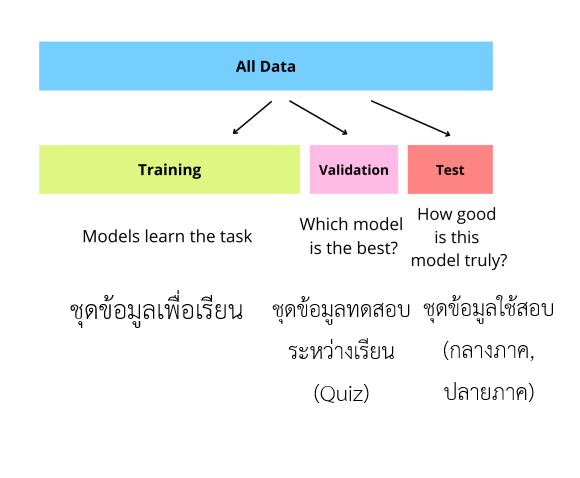

In [4]:
# การทำให้ข้อมูลกระจัดกระจาย เช่น (-255 ถึง 255) เป็นมาตรฐานเชิงสถิติ (0 ถึง 1)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

StandardScaler มีไว้เพื่อจัดเรียงชุดข้อมูลที่กระจัดกระจาย (ยกตัวอย่างง่าย ๆ คือข้อมูลที่มีค่ามากกว่าเท่ากับ 6 เมื่อเจอกับโหนดต่อๆไปก็มีจะค่าที่เพิ่มขึ้น ซึ่งการโตของค่าในโหนดที่มากเกินไปอาจทำให้โหนดจดจำข้อมูลที่ไม่จำเป็น) ดังนั้นการจัดข้อมูลที่มีค่ามาก ๆ ให้อยู่ในฟอร์มมาตรฐานหรือช่วงที่กำหนด (กล่าวคือมีค่าเฉลี่ย [-1, 1] หรือ [0, 1] เป็นต้น) ทำให้โมเดลเรียนรู้ไม่ต้องเรียนรู้จากค่าที่มาก ๆ จน เกินไป

\
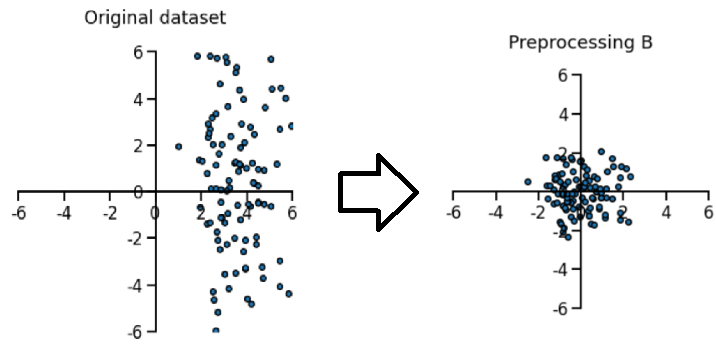

tensor = สร้างเมริกซ์ที่มีมิติใหม่เพื่อรองรับการคำนวณแบบชุดข้อมูล (ฺBatch run)\
X_train/X_val array: [1599, 11] == [(จำนวนข้อมูล row count), (จำนวน feature attributes ตั้งแต่ acidity, ..., quality ยกเว้น pH)]\
X_train/X_val tensor: ข้อมูลมิติใหม่ที่ใช้เทรนแบบ Tensor

In [6]:
import torch

# แปลงจากข้อมูลที่ทำให้เป็นมาตรฐานเข้าไปอยู่ในรูปแบบเทนเซอร์เพื่อรองรับการประมวลผลแบบชุด
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)

print(f"X_train แบบไม่ normalized: {X_train}\n\n",
      f"X_train_scaled แบบ normalized แล้ว: {X_train_scaled}\n\n",
      f"X_train_tensor แบบแปลง array to tensor แล้ว: {X_train_tensor}")

X_train แบบไม่ normalized:       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
493             8.7             0.690         0.31             3.0      0.086   
354             6.1             0.210         0.40             1.4      0.066   
342            10.9             0.390         0.47             1.8      0.118   
834             8.8             0.685         0.26             1.6      0.088   
705             8.4             1.035         0.15             6.0      0.073   
...             ...               ...          ...             ...        ...   
1130            9.1             0.600         0.00             1.9      0.058   
1294            8.2             0.635         0.10             2.1      0.073   
860             7.2             0.620         0.06             2.7      0.077   
1459            7.9             0.200         0.35             1.7      0.054   
1126            5.8             0.290         0.26             1.7      0.063   



In [ ]:
# @title กำหนดโมเดล NN สำหรับประมวลผลข้อมูลตัวแปรต้น (input_dim โหนด) สำหรับทำนายตัวแปรตามเชิงเลข (output_dim โหนด)
import torch.nn as nn

# input input_dim โหนด --> output_dim โหนด
class WineQuality_1layerMLP_Regression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(WineQuality_1layerMLP_Regression, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, output_dim)
        )
    def forward(self, x):
        return self.layers(x)

# input input_dim โหนด --> hidden layer hidden_dim โหนด --> output_dim โหนด
class WineQuality_2layerMLP_Regression(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(WineQuality_2layerMLP_Regression, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )
    def forward(self, x):
        return self.layers(x)

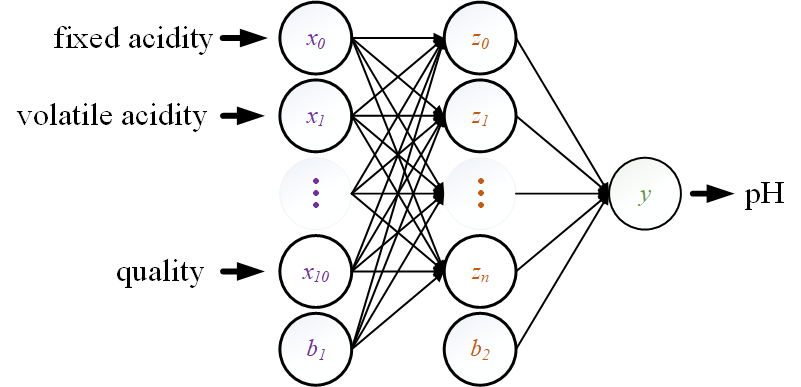

#### การวัดผล R-squared สำหรับงานการถดถอยเชิงเส้น (Regression) ทำเพื่ออะไร?

คำตอบ: เพื่อทดสอบความเข้าใจของโมเดลว่าทำนายความสัมพันธ์ของข้อมูลตัวแปรตามที่ถูกทำนายนี้ (predicted output; y_hat) ใกล้เคียงกับข้อมูลตัวแปรตามจริง (ground_truth; y) หรือไม่ \
**R-squared --> 1** หมายถึง เส้นถดถอยเชิงเส้นเพื่อสร้างตัวแปรตามที่ทำนายและตัวแปรตามจริงตามมีความสัมพันธ์ไปในทางเดียวกันอย่างมาก หมายถึงโมเดลทำนายการถดถอยเชิงเส้นได้ถูกต้องอย่างมาก \
**R-squared --> -1** หมายถึง เส้นถดถอยเชิงเส้นเพื่อสร้างตัวแปรตามที่ทำนายและตัวแปรตามจริงมีความสัมพันธ์ไปในทางตรงกันข้ามกันอย่างมาก หมายถึงโมเดลทำนายการถดถอยเชิงเส้นได้ผิดพลาดอย่างมาก \
**R-squared --> 0** หมายถึง เส้นถดถอยเชิงเส้นเพื่อสร้างตัวแปรตามที่ทำนายและตัวแปรตามจริงไม่มีความสัมพันธ์ใด ๆ ต่อกันเลย หมายถึงโมเดลทำนายการถดถอยเชิงเส้นได้ค่อนข้างผิดพลาด


\
ตัวอย่าง \
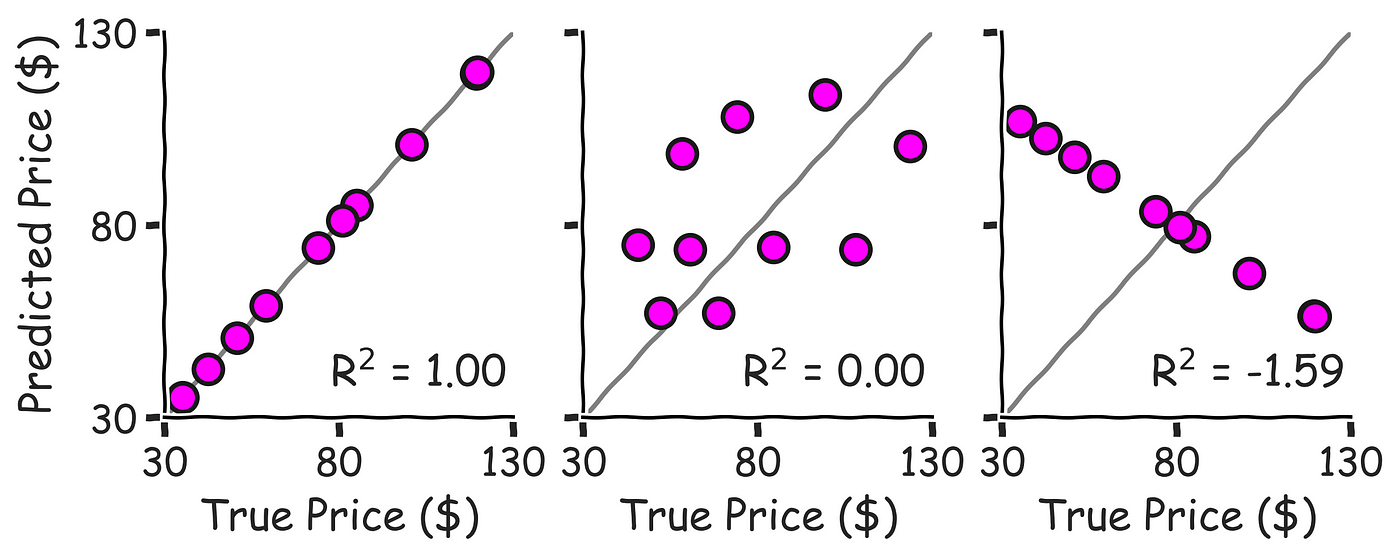

\
ทดสอบ \
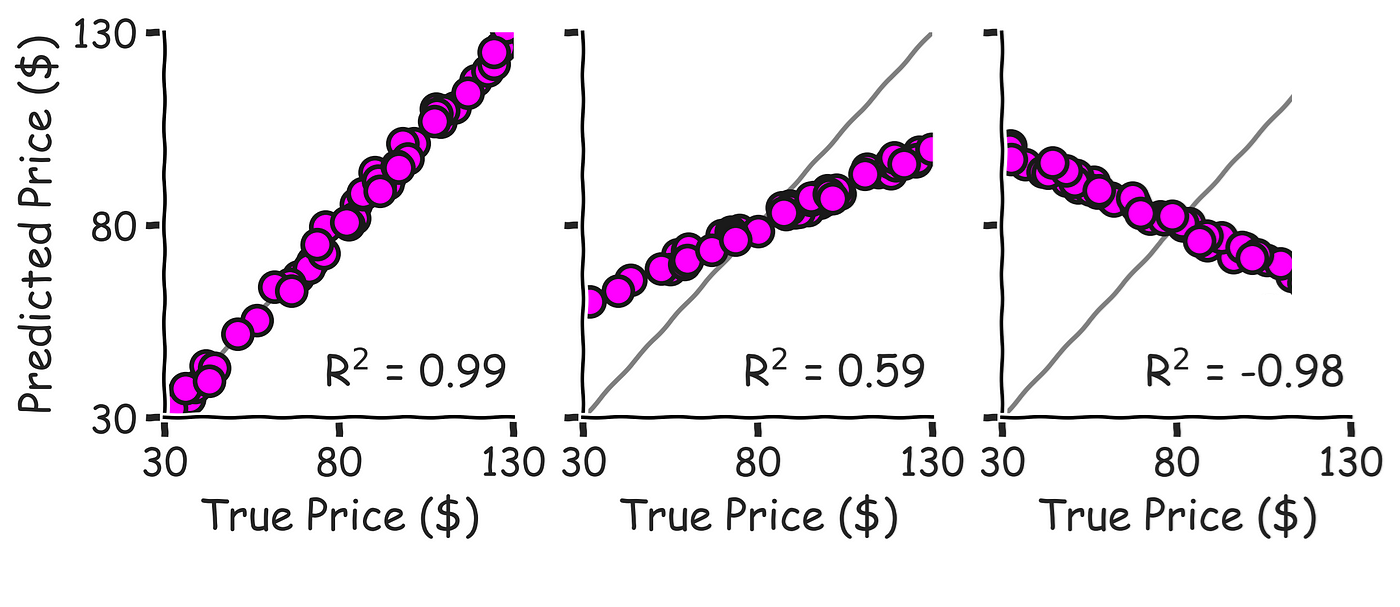


In [ ]:
# @title จำนวนตัวแปรต้นทั้งหมด input_dim = 10 โหนด, ตัวแปรตามทำนายซึ่งมี output_dim = 1 โหนด (ครอบคลุมทุกค่าเชิงเลข)
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import r2_score

##################################
model_type = 'reg_2layer'
# Hyperparameters
lr = 0.001
batch_size = 32
epochs = 10000
##################################

# กำหนดจำนวนตัวแปรและจำนวนโหนดที่ใช้ในโมเดล (Define model)
# จำนวนตัวแปรต้น = ค่า input_dim โหนด, ตัวแปรตามทำนาย = 1 โหนด
input_dim = X_train_tensor.shape[1]
hidden_dim = 32
output_dim = 1
model_reg = WineQuality_2layerMLP_Regression(input_dim, hidden_dim, output_dim) if model_type == 'reg_2layer' \
        else WineQuality_1layerMLP_Regression(input_dim, output_dim)

# ตัวโหลดข้อมูล (Dataloaders)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# กำหนดฟังก์ชั่นสูญเสียและปรับปรุง (Loss and optimizer)
criterion = nn.MSELoss()  # ฟังก์ชั่นต้นทุนสูญเสียแบบกำลังสองเฉลี่ย (MSE)
optimizer = torch.optim.SGD(model_reg.parameters(), lr=lr)

# กำหนดลิสเปล่าเพื่อเก็บค่าสำหรับคำนวณและแสดงผล (Lists to store loss and R2 values)
train_losses = []
val_losses = []
val_r2_scores = []

for epoch in range(epochs):
    model_reg.train()
    epoch_train_loss = 0
    for batch_X, batch_y in train_loader:
        outputs = model_reg(batch_X)
        loss = criterion(outputs, batch_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()

    # Validation
    model_reg.eval()
    epoch_val_loss = 0
    all_val_outputs = []
    all_val_targets = []
    with torch.no_grad():
        for batch_val_X, batch_val_y in val_loader:
            val_outputs = model_reg(batch_val_X)
            loss = criterion(val_outputs, batch_val_y)
            epoch_val_loss += loss.item()
            all_val_outputs.extend(val_outputs.cpu().numpy())
            all_val_targets.extend(batch_val_y.cpu().numpy())

    # Calculate R2 score
    r2 = r2_score(all_val_targets, all_val_outputs)
    val_r2_scores.append(r2)

    print(f'Epoch [{epoch+1}/{epochs}], '
          f'Train_Loss: {epoch_train_loss:.4f}, '
          f'Valid_Loss: {epoch_val_loss:.4f}, '
          f'Valid_R2: {r2:.4f}'
          )

Streaming output truncated to the last 5000 lines.
Epoch [5001/10000], Train_Loss: 0.2014, Valid_Loss: 0.0628, Valid_R2: 0.7415
Epoch [5002/10000], Train_Loss: 0.2014, Valid_Loss: 0.0627, Valid_R2: 0.7418
Epoch [5003/10000], Train_Loss: 0.2013, Valid_Loss: 0.0627, Valid_R2: 0.7417
Epoch [5004/10000], Train_Loss: 0.2013, Valid_Loss: 0.0627, Valid_R2: 0.7417
Epoch [5005/10000], Train_Loss: 0.2014, Valid_Loss: 0.0627, Valid_R2: 0.7416
Epoch [5006/10000], Train_Loss: 0.2012, Valid_Loss: 0.0627, Valid_R2: 0.7416
Epoch [5007/10000], Train_Loss: 0.2013, Valid_Loss: 0.0627, Valid_R2: 0.7417
Epoch [5008/10000], Train_Loss: 0.2013, Valid_Loss: 0.0628, Valid_R2: 0.7416
Epoch [5009/10000], Train_Loss: 0.2012, Valid_Loss: 0.0627, Valid_R2: 0.7417
Epoch [5010/10000], Train_Loss: 0.2012, Valid_Loss: 0.0627, Valid_R2: 0.7417
Epoch [5011/10000], Train_Loss: 0.2012, Valid_Loss: 0.0627, Valid_R2: 0.7417
Epoch [5012/10000], Train_Loss: 0.2012, Valid_Loss: 0.0628, Valid_R2: 0.7416
Epoch [5013/10000], Train

----
### พิจารณาตัวแปรต้นที่มีความสัมพันธ์ไปทางในทิศเดียวกันอย่างมาก

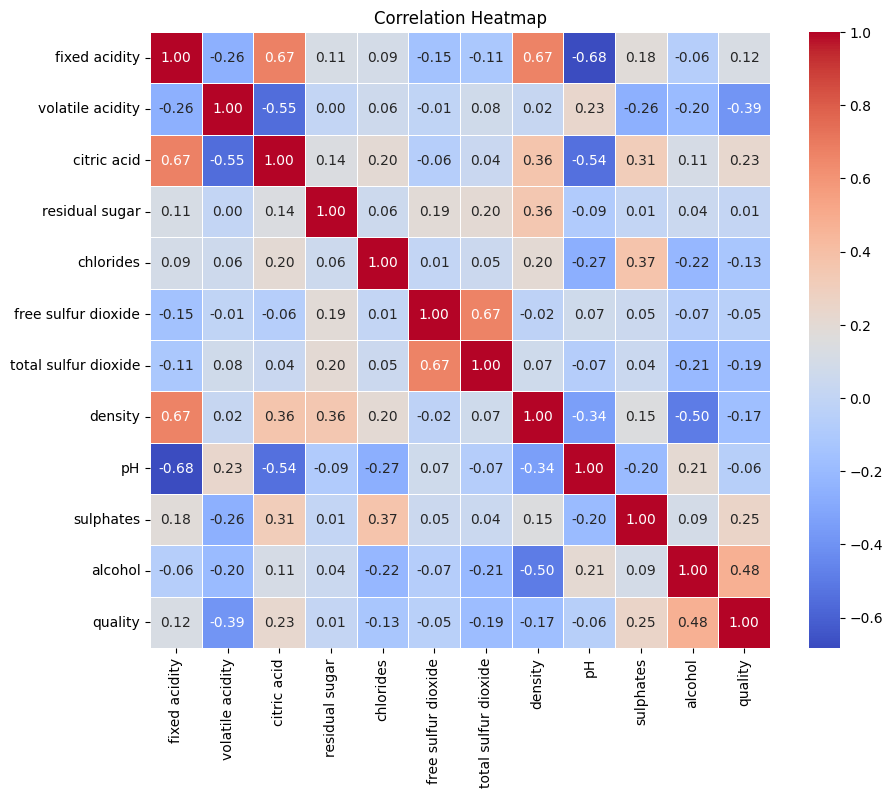

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

ผลที่ได้คือมีตัวแปร 3 ตัวที่ส่งผลต่อการเปลี่ยนแปลงของความเป็นกรด-ด่าง (pH) ไปในทางเดียวกัน คือ **volatile acidity (0.23), free sulfur dioxide (0.07) และ alcohol (0.21)** ดังนั้นเราจะใช้ข้อมูลฟีเจอรฺ์เพียงแค่ 3 ตัวจาก 10 ตัวเดิมเป็นตัวแปรขาเข้าสำหรับทำนายเชิงเลขเพื่อหาความสัมพันธ์ต่อตัวแปรความเป็นกรด-ด่าง (pH)

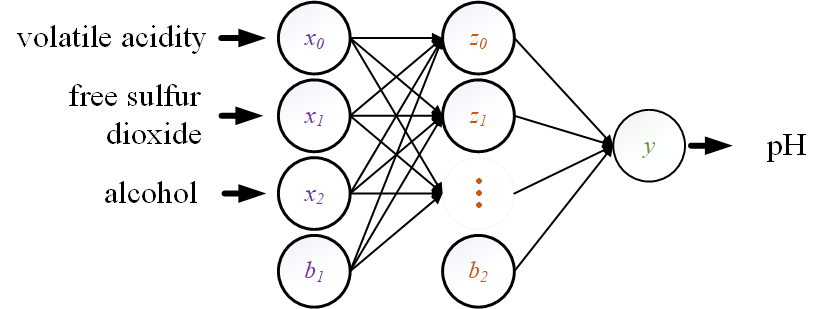

In [ ]:
# @title ลดจำนวนตัวแปรต้นเหลือเฉพาะที่มีความสัมพันธ์ไปในทางเดียวกันเป็นไปได้ input_dim = 3 โหนด, ตัวแปรตามทำนายเป็น output_dim = 1 โหนด (ครอบคลุมทุกค่าเชิงเลข)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# เลือกข้อมูลสำหรับเป็นข้อมูลตัวแปรต้น x ที่ผลต่อตัวแปรตาม y จากจาเมทริกซ์สหสัมพันธ์ (-1: ความสัมพันธ์ตรงกันข้ามมากสุด, 1: ความสัมพันธ์ในทางเดียวกันมากสุด, 0: ไม่มีความสัมพันธ์ใดๆต่อกัน)
# X = df.drop(columns=['quality'])
X = df[['volatile acidity', 'free sulfur dioxide', 'alcohol']]
y = df[['pH']]

# การทำให้ข้อมูลกระจัดกระจาย เช่น (-255 ถึง 255) เป็นมาตรฐานเชิงสถิติ (0 ถึง 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# แบ่งข้อมูลสำหรับฝึกและทดสอบ
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

import torch
# แปลงจากข้อมูลที่ทำให้เป็นมาตรฐานเข้าไปอยู่ในรูปแบบเทนเซอร์เพื่อรองรับการประมวลผลแบบชุด
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)

from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import r2_score
##################################
model_type = 'reg_2layer'
# Hyperparameters
lr = 0.001
batch_size = 32
epochs = 10000
##################################

# กำหนดจำนวนตัวแปรและจำนวนโหนดที่ใช้ในโมเดล (Define model)
# จำนวนตัวแปรต้น = ค่า input_dim โหนด, ตัวแปรตามทำนาย = 1 โหนด
input_dim = X_train_tensor.shape[1]
hidden_dim = 32
output_dim = 1
model_reg = WineQuality_2layerMLP_Regression(input_dim, hidden_dim, output_dim) if model_type == 'reg_2layer' \
        else WineQuality_1layerMLP_Regression(input_dim, output_dim)

# ตัวโหลดข้อมูล (Dataloaders)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# กำหนดฟังก์ชั่นสูญเสียและปรับปรุง (Loss and optimizer)
criterion = nn.MSELoss()  # ฟังก์ชั่นต้นทุนสูญเสียแบบกำลังสองเฉลี่ย (MSE)
optimizer = torch.optim.SGD(model_reg.parameters(), lr=lr)

# กำหนดลิสเปล่าเพื่อเก็บค่าสำหรับคำนวณและแสดงผล (Lists to store loss and R2 values)
train_losses = []
val_losses = []
val_r2_scores = []

for epoch in range(epochs):
    model_reg.train()
    epoch_train_loss = 0
    for batch_X, batch_y in train_loader:
        outputs = model_reg(batch_X)
        loss = criterion(outputs, batch_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()

    # Validation
    model_reg.eval()
    epoch_val_loss = 0
    all_val_outputs = []
    all_val_targets = []
    with torch.no_grad():
        for batch_val_X, batch_val_y in val_loader:
            val_outputs = model_reg(batch_val_X)
            loss = criterion(val_outputs, batch_val_y)
            epoch_val_loss += loss.item()
            all_val_outputs.extend(val_outputs.cpu().numpy())
            all_val_targets.extend(batch_val_y.cpu().numpy())

    # Calculate R2 score
    r2 = r2_score(all_val_targets, all_val_outputs)
    val_r2_scores.append(r2)

    print(f'Epoch [{epoch+1}/{epochs}], '
          f'Train_Loss: {epoch_train_loss:.4f}, '
          f'Valid_Loss: {epoch_val_loss:.4f}, '
          f'Valid_R2: {r2:.4f}'
          )

Streaming output truncated to the last 5000 lines.
Epoch [5001/10000], Train_Loss: 0.2031, Valid_Loss: 0.0569, Valid_R2: 0.7655
Epoch [5002/10000], Train_Loss: 0.2031, Valid_Loss: 0.0569, Valid_R2: 0.7655
Epoch [5003/10000], Train_Loss: 0.2031, Valid_Loss: 0.0569, Valid_R2: 0.7655
Epoch [5004/10000], Train_Loss: 0.2031, Valid_Loss: 0.0570, Valid_R2: 0.7653
Epoch [5005/10000], Train_Loss: 0.2030, Valid_Loss: 0.0570, Valid_R2: 0.7653
Epoch [5006/10000], Train_Loss: 0.2031, Valid_Loss: 0.0570, Valid_R2: 0.7652
Epoch [5007/10000], Train_Loss: 0.2029, Valid_Loss: 0.0570, Valid_R2: 0.7653
Epoch [5008/10000], Train_Loss: 0.2029, Valid_Loss: 0.0570, Valid_R2: 0.7653
Epoch [5009/10000], Train_Loss: 0.2030, Valid_Loss: 0.0570, Valid_R2: 0.7654
Epoch [5010/10000], Train_Loss: 0.2031, Valid_Loss: 0.0570, Valid_R2: 0.7653
Epoch [5011/10000], Train_Loss: 0.2030, Valid_Loss: 0.0570, Valid_R2: 0.7652
Epoch [5012/10000], Train_Loss: 0.2030, Valid_Loss: 0.0570, Valid_R2: 0.7652
Epoch [5013/10000], Train

จะเห็นว่าผลจากการเลือกตัวแปรที่มีความสัมพันธ์ต่อตัวแปรตามมากจาก df.corr() ช่วยให้จำกัดตัวแปรต้นที่มีผลอย่างมากได้ ส่งผลให้การสร้างเส้นถดถอยสร้างความสัมพันธ์ระหว่างตัวแปรต้นต่อตัวแปรตามที่ทำนายออกมาได้ใกล้เคียงกับข้อมูลตัวแปรตามจริงมากขึ้น

### ผลการหาความสัมพันธ์ระหว่างเส้นถดถอยที่ทำนายต่อค่าจริง (R-squared)

|Epoch=10k|10 vars (All attributes)|3 vars ('volatile acidity', 'free sulfur dioxide', 'alcohol')|
|-|-|-|
|MLP 2 layers (32 hidden nodes, 1 output nodes)|0.7515|***0.7718***|

Epoch [50/1000], Loss: 1.5657
Epoch [100/1000], Loss: 0.5968
Epoch [150/1000], Loss: 0.5497
Epoch [200/1000], Loss: 1.0335
Epoch [250/1000], Loss: 1.1887
Epoch [300/1000], Loss: 1.0233
Epoch [350/1000], Loss: 1.3625
Epoch [400/1000], Loss: 0.9754
Epoch [450/1000], Loss: 0.8564
Epoch [500/1000], Loss: 0.9783
Epoch [550/1000], Loss: 0.7772
Epoch [600/1000], Loss: 0.3912
Epoch [650/1000], Loss: 0.9454
Epoch [700/1000], Loss: 0.5412
Epoch [750/1000], Loss: 0.6517
Epoch [800/1000], Loss: 0.6028
Epoch [850/1000], Loss: 0.9883
Epoch [900/1000], Loss: 1.1796
Epoch [950/1000], Loss: 1.3703
Epoch [1000/1000], Loss: 0.6960


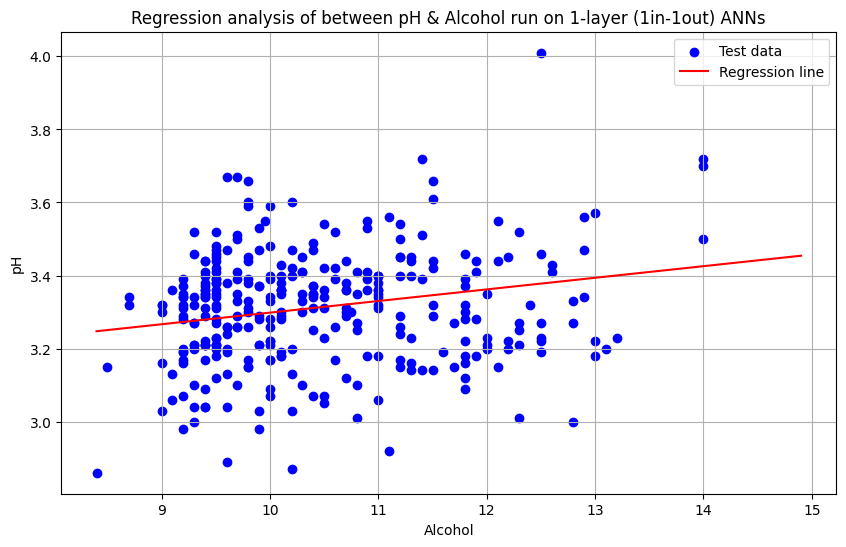

In [ ]:
# @title ตัวอย่างพล็อตเส้นความสัมพันธ์ระหว่างเส้นถดถอยเพื่อสร้างตัวแปรตามเชิงทำนายแบบที่มีผลต่อตัวแปรตามจริง pH มากที่สุด สมมุติว่าใช้ Alcohol ที่ความสัมพันธ์ต่อ pH (0.21) ต่อตัวแปรตามคือ pH (Single variables) แบบสมการเชิงเส้นอย่างง่ายผ่าน 1 input --> 1 output (Single layer)
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# เตรียมข้อมูล
X = df[['alcohol']].values.astype(np.float32)
y = df['pH'].values.astype(np.float32).reshape(-1, 1)

# แบ่งข้อมูล
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ปรับขนาดข้อมูล
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# แปลงเป็น PyTorch Tensors
X_train_tensor = torch.tensor(X_train_scaled)
y_train_tensor = torch.tensor(y_train_scaled)
X_test_tensor = torch.tensor(X_test_scaled)
y_test_tensor = torch.tensor(y_test_scaled)

##################################
model_type = 'reg_1layer'
# Hyperparameters
lr = 0.001
batch_size = 32
epochs = 1000
##################################

input_dim = X_train_scaled.shape[1]
hidden_dim = 32
output_dim = 1
model_reg = WineQuality_2layerMLP_Regression(input_dim, hidden_dim, output_dim) if model_type == 'reg_2layer' \
        else WineQuality_1layerMLP_Regression(input_dim, output_dim)

# ตัวโหลดข้อมูล (Dataloaders)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# กำหนดฟังก์ชัน Loss และ Optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model_reg.parameters(), lr=lr)

# ฝึกโมเดล
for epoch in range(epochs):
    model_reg.train()
    epoch_train_loss = 0
    for batch_X, batch_y in train_loader:
        outputs = model_reg(batch_X)
        loss = criterion(outputs, batch_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()

    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# สร้างช่วงค่า Alcohol สำหรับการพล็อต
x_min, x_max = X[:, 0].min(), X[:, 0].max()# X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
x_plot_np = np.linspace(x_min, x_max, 100).reshape(-1, 1).astype(np.float32)
x_plot_scaled = scaler_X.transform(x_plot_np)
x_plot_tensor = torch.tensor(x_plot_scaled)

# ทำนายค่า pH
model_reg.eval()  # ตั้งโมเดลเป็น evaluation mode
with torch.no_grad():
    y_plot_pred_scaled_tensor = model_reg(x_plot_tensor)
    y_plot_pred_scaled_np = y_plot_pred_scaled_tensor.cpu().numpy()
    y_plot_pred = scaler_y.inverse_transform(y_plot_pred_scaled_np)

# Calculate R2 score
# r2 = r2_score(y_test, y_plot_pred)
# val_r2_scores.append(r2)

# พล็อต
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, color='blue', label='Test data')
plt.plot(x_plot_np, y_plot_pred, color='red', label='Regression line')
plt.xlabel('Alcohol')
plt.ylabel('pH')
plt.title('Regression analysis of between pH & Alcohol run on 1-layer (1in-1out) ANNs')
plt.legend()
plt.grid(True)
plt.show()

Epoch [50/1000], Loss: 0.8019
Epoch [100/1000], Loss: 0.8681
Epoch [150/1000], Loss: 0.9627
Epoch [200/1000], Loss: 0.5109
Epoch [250/1000], Loss: 1.0785
Epoch [300/1000], Loss: 0.9618
Epoch [350/1000], Loss: 0.7791
Epoch [400/1000], Loss: 1.0998
Epoch [450/1000], Loss: 0.9163
Epoch [500/1000], Loss: 0.6513
Epoch [550/1000], Loss: 0.7969
Epoch [600/1000], Loss: 0.9556
Epoch [650/1000], Loss: 0.8452
Epoch [700/1000], Loss: 0.7897
Epoch [750/1000], Loss: 0.7981
Epoch [800/1000], Loss: 1.3392
Epoch [850/1000], Loss: 1.3710
Epoch [900/1000], Loss: 0.7792
Epoch [950/1000], Loss: 1.0950
Epoch [1000/1000], Loss: 0.9191


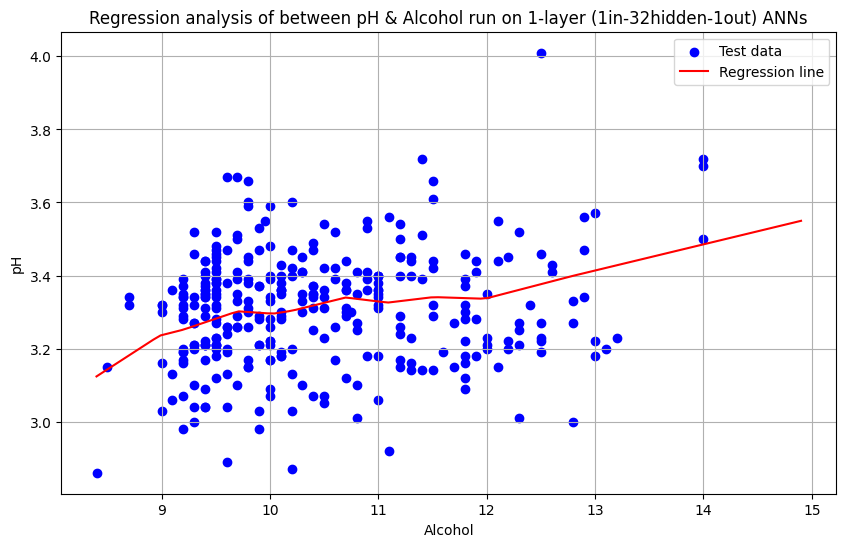

In [ ]:
# @title ตัวอย่างพล็อตเส้นความสัมพันธ์ระหว่างตัวแปรต้นแบบหยาบ ๆ ที่มีผลต่อ pH มากที่สุด เช่น Alcohol ต่อตัวแปรตามคือ pH (Single variables) เพิ่ม hidden layer (Two layers) เพื่อสร้างเส้น regression line ที่โค้งขึ้นแบบคร่าว ๆ สร้างจากตัวแทนที่ถูกทำนายต่อกัน
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# เตรียมข้อมูล
X = df[['alcohol']].values.astype(np.float32)
y = df['pH'].values.astype(np.float32).reshape(-1, 1)

# แบ่งข้อมูล
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ปรับขนาดข้อมูล
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# แปลงเป็น PyTorch Tensors
X_train_tensor = torch.tensor(X_train_scaled)
y_train_tensor = torch.tensor(y_train_scaled)
X_test_tensor = torch.tensor(X_test_scaled)
y_test_tensor = torch.tensor(y_test_scaled)

##################################
model_type = 'reg_2layer'
# Hyperparameters
lr = 0.001
batch_size = 32
epochs = 1000
##################################

input_dim = X_train_scaled.shape[1]
hidden_dim = 32
output_dim = 1
model_reg = WineQuality_2layerMLP_Regression(input_dim, hidden_dim, output_dim) if model_type == 'reg_2layer' \
        else WineQuality_1layerMLP_Regression(input_dim, output_dim)

# ตัวโหลดข้อมูล (Dataloaders)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# กำหนดฟังก์ชัน Loss และ Optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model_reg.parameters(), lr=lr)

# ฝึกโมเดล
for epoch in range(epochs):
    model_reg.train()
    epoch_train_loss = 0
    for batch_X, batch_y in train_loader:
        outputs = model_reg(batch_X)
        loss = criterion(outputs, batch_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()

    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# สร้างช่วงค่า Alcohol สำหรับการพล็อต
x_min, x_max = X[:, 0].min(), X[:, 0].max()# X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
x_plot_np = np.linspace(x_min, x_max, 100).reshape(-1, 1).astype(np.float32)
x_plot_scaled = scaler_X.transform(x_plot_np)
x_plot_tensor = torch.tensor(x_plot_scaled)

# ทำนายค่า pH
model_reg.eval()  # ตั้งโมเดลเป็น evaluation mode
with torch.no_grad():
    y_plot_pred_scaled_tensor = model_reg(x_plot_tensor)
    y_plot_pred_scaled_np = y_plot_pred_scaled_tensor.cpu().numpy()
    y_plot_pred = scaler_y.inverse_transform(y_plot_pred_scaled_np)

# Calculate R2 score
# r2 = r2_score(y_test, y_plot_pred)
# val_r2_scores.append(r2)

# พล็อต
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, color='blue', label='Test data')
plt.plot(x_plot_np, y_plot_pred, color='red', label='Regression line')
plt.xlabel('Alcohol')
plt.ylabel('pH')
plt.title('Regression analysis of between pH & Alcohol run on 1-layer (1in-32hidden-1out) ANNs')
plt.legend()
plt.grid(True)
plt.show()

จากเส้นถดถอยที่ทำนายเริ่มมีความโค้งไปตามกลุ่มข้อมูลมากขึ้น อันเนื่องจากเลเยอร์แฝง (hidden layers) มากขึ้น ผนวกกับ การปรับใช้ relu activation function สร้างเส้นใหม่ที่ยักไปมาตามความสอดคล้องของโหนดที่ทำงานตามที่เคยเรียนมาในครั้งก่อน ๆ

----
## งานคัดแยก (Classification task)

จากโจทย์ข้อ 2 ต้องการพิจารณาและทำนายคุณภาพของไวน์ที่เกินระดับ 6 ขึ้นไปถือว่าไวน์มีคุณภาพดี เราสามารถกำหนดให้คุณภาพไวน์มากกว่าเท่ากับ 6 เป็น positive class และถ้าน้อยกว่า 6 ให้เป็น negative class

In [7]:
# vvvvvvvvvvvvvvvvvvvv
ds_import = "local"
# ^^^^^^^^^^^^^^^^^^^^
if ds_import == "url":
  # Option1: โหลดชุดข้อมูล (จาก URL ที่เข้าถึงได้)
  url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
  df = pd.read_csv(url, sep=';')
elif ds_import == "local":
  # Option2: โหลดชุดข้อมูลจากเครื่องส่วนตัว (อัพไฟล์โดยการโยนไฟล์ไปที่แถบ Files ด้านซ้ายจะได้ไฟล์ที่มีชื่อว่า winequality-red.csv)
  ds = "./winequality-red.csv"
  df = pd.read_csv(ds)
else:
  raise ValueError("choose at least one method to import dataset")

# กำหนดตัวแปรตามหรือค่าจริงของเรา คือ คุณภาพของไวน์ กำหนดช่วงให้ว่า ถ้ามากกว่าเท่ากับ 6 ถือว่าผ่าเนกณฑ์คุณภาพที่ดี (postitive class) มิฉะนั้นจะถือว่าคุณภาพแย่ (negative class)
df['quality'] = (df['quality'] >= 6).astype(int)
# Split features and target
X = df.drop(columns=['quality'])
y = df['quality']

print("ค่าเอกลักษณ์ของคลาสที่กำหนดใช้จริง: ", df['quality'].unique())
print("จำนวนคลาสที่กำหนดใช้จริง: ", df['quality'].value_counts())

ค่าเอกลักษณ์ของคลาสที่กำหนดใช้จริง:  [0 1]
จำนวนคลาสที่กำหนดใช้จริง:  quality
1    855
0    744
Name: count, dtype: int64


การกำหนดโมเดลใช้ในงานคัดแยกของเราทดสอบเพิ่มโหนดคัดแยกชัดเจนเป็น output 2 nodes ก็เป็นไปได้โดยกำนดให้โหนด y0 ทำนายผลสำหรับไม่ผ่านคุณภาพ และโหนด y1 ทำนายผ่านคุณภาพแยกกันอย่างชัดเจน

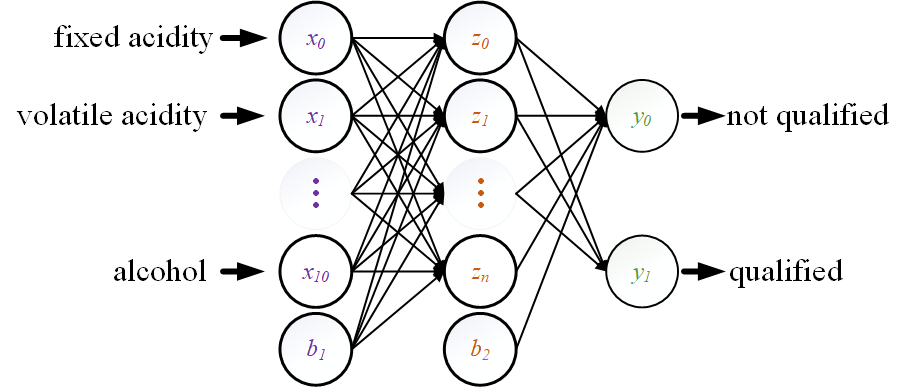

In [ ]:
# @title จำนวนตัวแปรต้นทั้งหมด input_dim = 10 โหนด, ตัวแปรตามทำนายเป็น output_dim = 2 โหนด (ทำนาย positive/negative classes)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# แบ่งข้อมูลสำหรับฝึกและทดสอบ
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# การทำให้ข้อมูลกระจัดกระจาย เช่น (-255 ถึง 255) เป็นมาตรฐานเชิงสถิติ (0 ถึง 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score
#################################
model_type = 'cls_2layer'
# Hyperparameters
lr = 0.001
batch_size = 32
epochs = 10000
##################################

import torch
# แปลงจากข้อมูลที่ทำให้เป็นมาตรฐานเข้าไปอยู่ในรูปแบบเทนเซอร์เพื่อรองรับการประมวลผลแบบชุด
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)

# ตัวโหลดข้อมูล (Dataloaders)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


# กำหนดจำนวนตัวแปรและจำนวนโหนดที่ใช้ในโมเดล (Define model) ที่เราใช้ในที่นี้คือ 10-32-2 (input-hidden1-output)
input_dim = X_train_tensor.shape[1] # 11 : acidity --> alcohol
hidden_dim = 32
output_dim = 2  # 2 : positive (qualified)/negative class (not qualified)
model_cls = WineQuality_2layerMLP_Regression(input_dim, hidden_dim, output_dim) if model_type == 'cls_2layer' \
        else WineQuality_1layerMLP_Regression(input_dim, output_dim)


# กำหนดฟังก์ชั่นสูญเสียและปรับปรุง (Loss and optimizer)
criterion = nn.CrossEntropyLoss()  # Binary classification, softmax used internally
optimizer = torch.optim.SGD(model_cls.parameters(), lr=lr)

# กำหนดลิสเปล่าเพื่อเก็บค่าสำหรับคำนวณและแสดงผล (Lists to store loss and accuracy values)
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
avg_train_acc = 0
avg_val_acc = 0

# Begin training loop
for epoch in range(epochs):
    model_cls.train()
    train_acc = 0
    epoch_train_loss = 0

    # Train in batches
    for batch_X, batch_y in train_loader:
        outputs = model_cls(batch_X)
        loss = criterion(outputs, batch_y) # Calculate loss
        optimizer.zero_grad()
        loss.backward() # Apply gradient via backward propagation
        optimizer.step()
        epoch_train_loss += loss.item()
        # Training accuracy calculation within the training loop
        _, predicted = torch.max(outputs, 1)
        train_acc += (predicted == batch_y).sum().item()  #batch_y = [0, 1]

    avg_train_loss = epoch_train_loss / len(train_dataset)
    avg_train_acc = train_acc / len(train_dataset)
    # Average training loss and accuracy for the epoch
    train_losses.append(avg_train_loss)
    train_accuracies.append(avg_train_acc)

    # Validate accuracy
    model_cls.eval()
    val_acc = 0
    epoch_val_loss = 0
    for batch_val_X, batch_val_y in val_loader:
        with torch.no_grad():
            val_outputs = model_cls(batch_val_X)
            loss = criterion(val_outputs, batch_val_y)
            epoch_val_loss += loss.item()
            # Training accuracy calculation
            _, predicted = torch.max(val_outputs, 1)
            val_acc += (predicted == batch_val_y).sum().item()

    avg_val_acc = val_acc / len(val_dataset)
    avg_val_loss = epoch_val_loss / len(val_dataset)
    # Average training loss and accuracy for the epoch
    val_losses.append(avg_val_loss)
    val_accuracies.append(avg_val_acc)

    print(f"Epoch {epoch + 1}/{epochs}, \
    Loss (train/val): {avg_train_loss:.4f}/{avg_val_loss:.4f}, \
    Accuracy (train/val): {avg_train_acc:.4f}/{avg_val_acc:.4f}")

Streaming output truncated to the last 5000 lines.
Epoch 5001/10000,     Loss (train/val): 0.0137/0.0149,     Accuracy (train/val): 0.7975/0.7594
Epoch 5002/10000,     Loss (train/val): 0.0137/0.0149,     Accuracy (train/val): 0.7975/0.7594
Epoch 5003/10000,     Loss (train/val): 0.0137/0.0149,     Accuracy (train/val): 0.7975/0.7594
Epoch 5004/10000,     Loss (train/val): 0.0137/0.0149,     Accuracy (train/val): 0.7975/0.7594
Epoch 5005/10000,     Loss (train/val): 0.0137/0.0149,     Accuracy (train/val): 0.7975/0.7594
Epoch 5006/10000,     Loss (train/val): 0.0137/0.0149,     Accuracy (train/val): 0.7975/0.7594
Epoch 5007/10000,     Loss (train/val): 0.0137/0.0149,     Accuracy (train/val): 0.7975/0.7594
Epoch 5008/10000,     Loss (train/val): 0.0137/0.0149,     Accuracy (train/val): 0.7975/0.7594
Epoch 5009/10000,     Loss (train/val): 0.0137/0.0149,     Accuracy (train/val): 0.7975/0.7594
Epoch 5010/10000,     Loss (train/val): 0.0137/0.0149,     Accuracy (train/val): 0.7959/0.7594

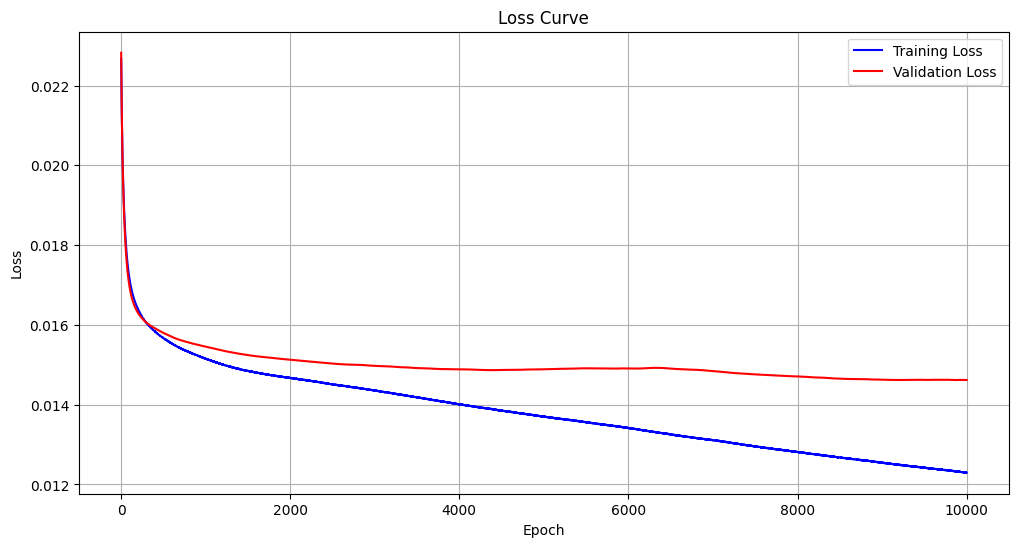

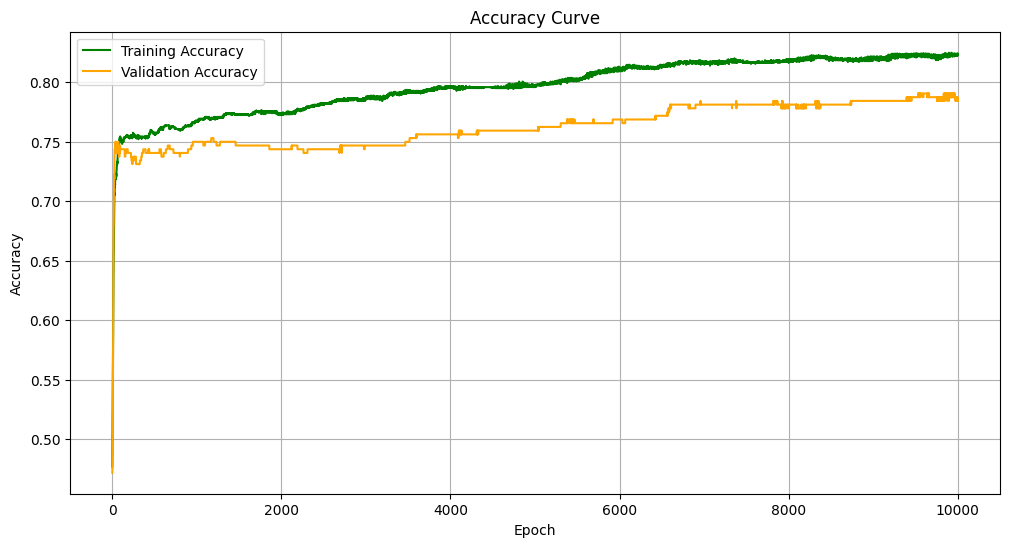

In [ ]:
# @title พล็อตเส้นโค้งลู่เข้าของประสิทธิภาพความแม่นยำ (Accuracy) และความสูญเสีย (Loss) ในขณะเรียนรู้ (Training) และประเมินโมเดล (Validation/Evaluation)
import matplotlib.pyplot as plt

# Create the figure
plt.figure(figsize=(12, 6))

epochs_list = list(range(1, epochs + 1)) # เขยิบการโชว์จาก epoch 0 (จากเดิมจะรัน 0-999) ให้โชว์เป็น epoch 1 แทน (ให้มนุษย์อ่านเข้าใจเป็น 1-1000)

# Plot loss
plt.plot(epochs_list, train_losses, label="Training Loss", color="blue")
plt.plot(epochs_list, val_losses, label="Validation Loss", color="red")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.grid()

# Create another figure for accuracy
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.plot(epochs_list, train_accuracies, label="Training Accuracy", color="green")
plt.plot(epochs_list, val_accuracies, label="Validation Accuracy", color="orange")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()
plt.grid()

plt.show()


### ทดสอบการทำนายจากชุดข้อมูลทดสอบ (Validation/Testing data)

ตัวอย่างตารางข้อมูลทดสอบ (Validation data) ของ Wine Quality dataset

|ข้อมูล|fixed acidity|volatile acidity|citric acid|residual sugar|chlorides|free sulfur dioxide|total sulfur dioxide|density|pH|sulphates|alcohol|quality|
|-|-|-|-|-|-|-|-|-|-|-|-|-|
|ข้อมูลทดสอบ[0]| 7.7| 0.560| 0.08|2.50|0.114| 14.0|46.0|0.99710|3.24|0.66| 9.6|Positive class = 1 (qualified) / True label = 6|
|ข้อมูลทดสอบ[1]|7.8|0.500|0.17|1.60|0.082|21.0| 102.0|0.99600|3.39|0.48|9.5|Negative class = 0 (Not qualified) / True label = 5|
|ข้อมูลทดสอบ[2]|10.7|0.670|0.22|2.70|0.107|17.0|34.0|1.00040|3.28|0.98|9.9|Positive class = 1 (qualified) / True label = 6|
...

ข้อมูลทดสอบกับข้อมูลทดสอบที่ได้รับการทำให้เป็นมาตรฐานในช่วง 0-1 เพื่อใช้ในการทดสอบที่เป็นมาตรฐานเชิงสถิติ

In [ ]:
print(f"***Validation data*** \n Features: {X_val}, Class label: {y_val} \n" )
print(f"***Standardized validation data*** \n Features: {X_val_tensor}, Class label: {y_val_tensor} \n" )

***Validation data*** 
 Features:       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
803             7.7             0.560         0.08            2.50      0.114   
124             7.8             0.500         0.17            1.60      0.082   
350            10.7             0.670         0.22            2.70      0.107   
682             8.5             0.460         0.31            2.25      0.078   
1326            6.7             0.460         0.24            1.70      0.077   
...             ...               ...          ...             ...        ...   
1259            6.8             0.640         0.00            2.70      0.123   
1295            6.6             0.630         0.00            4.30      0.093   
1155            8.3             0.600         0.25            2.20      0.118   
963             8.8             0.270         0.39            2.00      0.100   
704             9.1             0.765         0.04            1.60      0.0

In [ ]:
import numpy as np
# @title ทำนายผลจาก vaidation data index [0] ไวน์ชุดแรก
X_unknown = np.array([7.7, 0.560, 0.08, 2.50, 0.114, 14.0, 46.0, 0.99710, 3.24, 0.66, 9.6]).reshape(1, -1)
X_unknown = scaler.transform(X_unknown)
# X_unknown_scaled = scaler.transform(X_unknown) # Scale the unknown sample using the same scaler
X_unknown_tensor = torch.tensor(X_unknown, dtype=torch.float)

with torch.no_grad():
    y_pred_tensor = model_cls(X_unknown_tensor)
    _, predicted_class = torch.max(y_pred_tensor, 1)

predicted_class = predicted_class.item()
print("ผลการทำนายคุณภาพไวน์จากข้อมูลทดสอบ[0]:", "คุณภาพไม่ผ่าน" if predicted_class==0 else "คุณภาพผ่าน")

ผลการทำนายคุณภาพไวน์จากข้อมูลทดสอบ[0]: คุณภาพผ่าน


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np
# @title ทำนายผลจาก vaidation data index [1] ไวน์ชุดสอง
X_unknown = np.array([7.8, 0.500, 0.17, 1.60, 0.082, 21.0, 102.0, 0.99600, 3.39, 0.48, 9.5]).reshape(1, -1)
X_unknown = scaler.transform(X_unknown)
# X_unknown_scaled = scaler.transform(X_unknown) # Scale the unknown sample using the same scaler
X_unknown_tensor = torch.tensor(X_unknown, dtype=torch.float)

with torch.no_grad():
    y_pred_tensor = model_cls(X_unknown_tensor)
    _, predicted_class = torch.max(y_pred_tensor, 1)

predicted_class = predicted_class.item()
print("ผลการทำนายคุณภาพไวน์จากข้อมูลทดสอบ[1]:", "คุณภาพไม่ผ่าน" if predicted_class==0 else "คุณภาพผ่าน")



ผลการทำนายคุณภาพไวน์จากข้อมูลทดสอบ[1]: คุณภาพไม่ผ่าน


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np
# @title ทำนายผลจาก vaidation data index [2] ไวน์ชุดสาม
X_unknown = np.array([10.7, 0.670, 0.22, 2.70, 0.107, 17.0, 34.0, 1.00040, 3.28, 0.98, 9.9]).reshape(1, -1)
X_unknown = scaler.transform(X_unknown)
# X_unknown_scaled = scaler.transform(X_unknown) # Scale the unknown sample using the same scaler
X_unknown_tensor = torch.tensor(X_unknown, dtype=torch.float)

with torch.no_grad():
    y_pred_tensor = model_cls(X_unknown_tensor)
    _, predicted_class = torch.max(y_pred_tensor, 1)

predicted_class = predicted_class.item()
print("ผลการทำนายคุณภาพไวน์จากข้อมูลทดสอบ[2]:", "คุณภาพไม่ผ่าน" if predicted_class==0 else "คุณภาพผ่าน")

ผลการทำนายคุณภาพไวน์จากข้อมูลทดสอบ[2]: คุณภาพผ่าน


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


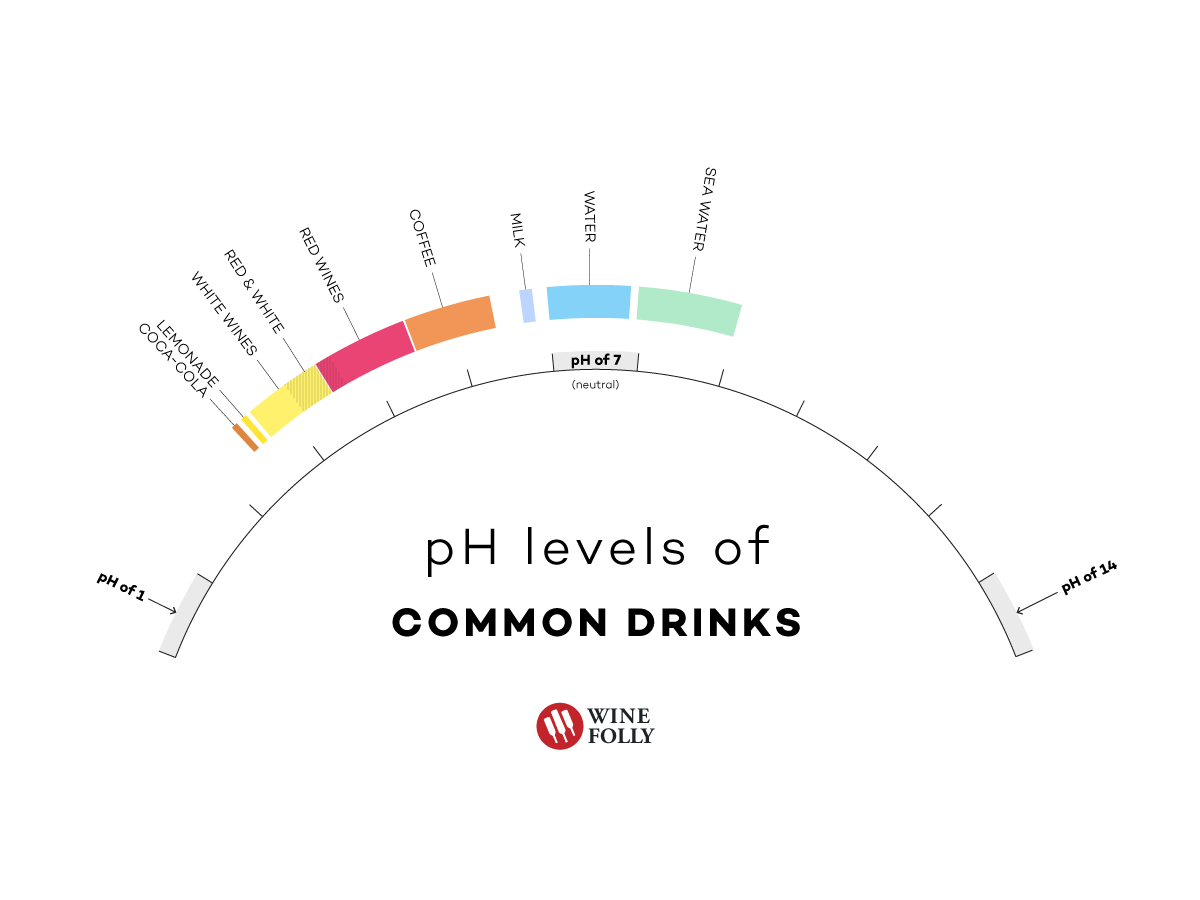

In [ ]:
import numpy as np
# @title ทำนายผลจาก vaidation data index [2] ไวน์ชุดสาม แต่ทดสอบปรับค่า pH เกินค่ามาตรฐานของการเป็นไวน์ที่ดีจากในช่วง 3.0-4.0 แต่เปลี่ยนเป็น 6.0 แทนจากช่วงตัวอย่างระดับ pH ภาพข้างบน
X_unknown = np.array([10.7, 0.670, 0.22, 2.70, 0.107, 17.0, 34.0, 1.00040, 6.0, 0.98, 9.9]).reshape(1, -1)
X_unknown = scaler.transform(X_unknown)
# X_unknown_scaled = scaler.transform(X_unknown) # Scale the unknown sample using the same scaler
X_unknown_tensor = torch.tensor(X_unknown, dtype=torch.float)

with torch.no_grad():
    y_pred_tensor = model_cls(X_unknown_tensor)
    _, predicted_class = torch.max(y_pred_tensor, 1)

predicted_class = predicted_class.item()
print("ผลการทำนายคุณภาพไวน์จากข้อมูลทดสอบ[2] ปรับค่า pH จาก 3.28 --> 6.0:", "คุณภาพไม่ผ่าน" if predicted_class==0 else "คุณภาพผ่าน")

ผลการทำนายคุณภาพไวน์จากข้อมูลทดสอบ[2] ปรับค่า pH จาก 3.28 --> 6.0: คุณภาพไม่ผ่าน


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# @title ทำนายผลจาก vaidation data ไวน์ทุกชุดในข้อมูลทดสอบ
with torch.no_grad():
    y_pred_tensor = model_cls(X_val_tensor)
    _, predicted_class = torch.max(y_pred_tensor, 1)
print("ผลการทำนายคุณภาพไวน์จากข้อมูลทดสอบ {0: คุณภาพไม่ผาน, 1: คุณภาพผ่าน}:", predicted_class)

ผลการทำนายคุณภาพไวน์จากข้อมูลทดสอบ {0: คุณภาพไม่ผาน, 1: คุณภาพผ่าน}: tensor([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
        1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
        1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
        1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1

In [2]:
# @title เก็บข้อมูลการประเมินลงบนไฟล์ csv log เพื่อให้ผู้ปฏิบัติการนำไปวิเคราะห์หรือรายงานต่อได้
# import torch
# import pandas as pd

# force dummy tensor test exporting
# predicted_class = torch.tensor([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
#         1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
#         0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
#         1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
#         0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
#         1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
#         1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
#         0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
#         0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
#         1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
#         0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
#         1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
#         0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
#         1, 0, 0, 1, 0, 0, 1, 0])

# Convert to pandas DataFrame
df = pd.DataFrame(predicted_class.numpy(), columns=["evaluated quality"])

# Save to CSV
df.to_csv("evaluation_output_for_winequality_test-val-set.csv", index=False)

### สรุป

โครงข่ายประสาทเทียม (Artificial Neural Networks) สามารถสร้างการทำนายเชิงเลข (Numerical computation) และการทำนายเชิงจำแนก (Categorical compputation) ได้ไม่ว่าจะเป็นข้อมูลเชิงภาพ ข้อมูลกระจัดกระจาย รวมถึงข้อมูลเชิงตารางที่ได้นำเสนอไปในทั้งหมด notebook นี้ โดยใช้ประโยชน์จากความสัมพันธ์เชิงข้อมูลหรือสถิติเป็นประโยชน์ นำไปสู่วิธ๊การกรองหรือประมวลผลข้อมูลก่อน (pre-processing) เพื่อให้การทำนายผลได้ประสิทธิภาพสูงสุด ง่ายต่อการเข้าใจ และง่ายต่อการทำนายเมื่อมีข้อมูลที่คล้ายกันถูกสะสมเพิ่มเติม